# Feature Engineering
___
## Notes
In this notebook, we will discuss the features needed for our machine learning model. 

Specifically, we'll be talking about the following:
> [Overview](#Overview:-Feature-Engineering)
>
> [Feature Creation](#Feature-Creation)
>
> [Feature Evaluation](#Feature-Evaluation)
>
> [Feature Transformations](#Feature-Transformations)

We finish the notebook off with a [review](#Review) of everything discussed. 

___

> ### Overview: Feature Engineering
> ___
> **Feature Engineering** refers to the process of creating new features or transforming old featues to get the most out of our data.
> 
> Last section, we looked at creating a vectorization that will be used as one feature for our model. However, we know that some other features may also prove to be quite useful, such as:
> - Length of the text
> - Percentage of characters that are punctuation
> - Percentage of characters that are capitalized
>
> We can also perform **transformations** on current data to create new features, such as:
> - Power transformations (square, square root, log, etc.)
> - Data standardization
>
> Of course, we need to be careful not to apply transformations on features that don't need to be transformed in the first place. We also need to make sure that the transformed feature is more informative than the untransformed feature. 
> 
> Let's jump in and see all of these concepts in action.

___

## Feature Creation

First, we'll read in our data as usual. 

In [1]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label','text']

Next, we will create a feature for the length of each sample (text message) in the data. 

We have a hypothesis that spam messages are longer than non-spam messages. 

In [3]:
data['text_length'] = data['text'].apply(lambda x: len(x) - x.count(" "))
data.head(10)

,label,text,text_length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135
6,spam,WINNER!! As a valued network customer you have...,132
7,spam,Had your mobile 11 months or more? U R entitle...,126
8,ham,I'm gonna be home soon and i don't want to tal...,89
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111


Now, we will create a feature for the percentage of punctuation in each sample (text message) in our data.

We have a hypothesis that spam messages have a larger number of punctuations than non-spam messages. 

In [4]:
import string

def punc_counter(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['punctuation'] = data['text'].apply(lambda x: punc_counter(x))
data.head(10)

,label,text,text_length,punctuation
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4
6,spam,WINNER!! As a valued network customer you have...,132,4.5
7,spam,Had your mobile 11 months or more? U R entitle...,126,1.6
8,ham,I'm gonna be home soon and i don't want to tal...,89,6.7
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111,7.2


___

## Feature Evaluation

Now that we have some features, we want to evaluate whether or not they will be useful for our model. 

We start by looking at our length feature. Recall our hypothesis: spam messages are longer than non-spam messages. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

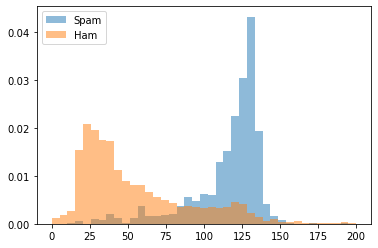

In [8]:
bins = np.linspace(0,200,40) # 40 evenly spaced numbers between 0 and 200, which represent bin cutoffs

plt.hist(data[data['label']=='spam']['text_length'], bins, alpha=0.5, density=True, label='Spam')
plt.hist(data[data['label']=='ham']['text_length'], bins, alpha=0.5, density=True, label='Ham')
plt.legend(loc='upper left');

*It looks like our hypothesis is correct!* Spam does indeed seem to have longer messages than non-spam messages.

Now we check out our punctuation feature. Recall our hypothesis: spam messages have a larger number of punctuations than non-spam messages.

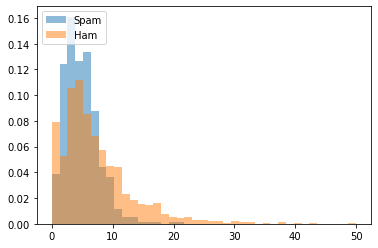

In [9]:
bins = np.linspace(0,50,40) # 40 evenly spaced numbers between 0 and 50, which represent bin cutoffs

plt.hist(data[data['label']=='spam']['punctuation'], bins, alpha=0.5, density=True, label='Spam')
plt.hist(data[data['label']=='ham']['punctuation'], bins, alpha=0.5, density=True, label='Ham')
plt.legend(loc='upper left');

*It looks like our hypothesis is incorrect!* We don't see an extreme difference between spam and non-spam messages in terms of punctuation.

Now, this doesn't mean that this feature is necessarily a bad feature. It may still prove useful, but we expect that our length feature will be much more useful for the model.  

___

## Feature Transformations

In the last section, we compared two distributions (spam and ham) together for each feature. 

This was helpful to determine if the feature would be useful to separate the classes, but it didn't give us a great sense of the overall distribution of the feature (and therefore if the overall distrbution was skewed, had large outliers, or anything like that which might indicate a transformation is needed).

Below, we'll take a closer look at both features distributions. 

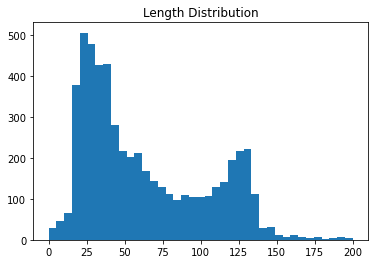

In [13]:
bins = np.linspace(0,200,40)

plt.hist(data['text_length'], bins)
plt.title('Length Distribution');

Note that this distribution doesn't have any huge outliers and isn't skewed heavily in one direction, so we aren't worried about making any transformations to this feature. 

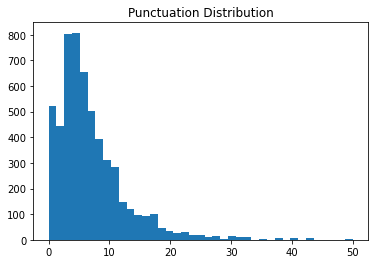

In [16]:
bins = np.linspace(0,50,40)

plt.hist(data['punctuation'], bins)
plt.title('Punctuation Distribution');

Note that this distribution is skewed heavily to one side and its tail reaches far out to outliers, so we should consider making a transformation on this feature.

When you transform a data set, you perform the same mathematical operation on each data point in
the set. 

> Today, we're going to be using a **Box-Cox power transformation** defined by $y^{\lambda}$, where: 
> - $y$ represents the data
> - $\lambda$ represents the "power" to which each data value is raised 
>
> Some common values of $\lambda$ are shown below, along with the corresponding transformation.
>
> | $\lambda$ | Transformation |
> | :-: | :-: |
> | -2 | $y^{-2}$ |
> | -1 | $y^{-1}$ |
> | -1/2 | $y^{-\frac{1}{2}}$ |
> | 0 | $\log(y)$ |
> | 1/2 | $y^{\frac{1}{2}}$ |
> | 1 | $y^{1}$ |
> | 2 | $y^{2}$ |
>
> The process for using such a transformation is simple:
> 1. Determine the range of $\lambda$s to test
> 2. Apply each transformation to each value of the chosen feature
> 3. Use some criteria (flexibility) to determine which transformation yielded the best distribution
>
> and that's it! 

Now that we've learned about the Box-Cox power transformation, let's apply it on our data. 

`Note:` We will use only positive values for $\lambda$ in this problem due to the fact that our data contains zero values.

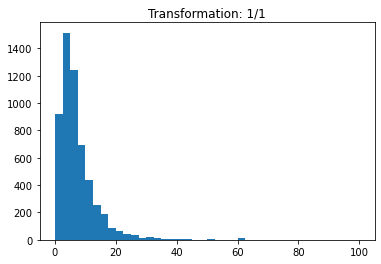

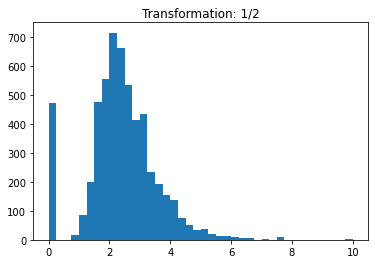

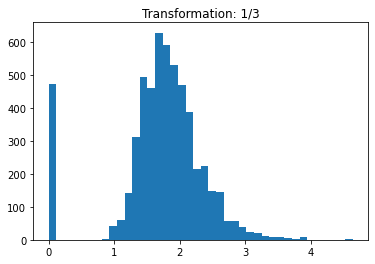

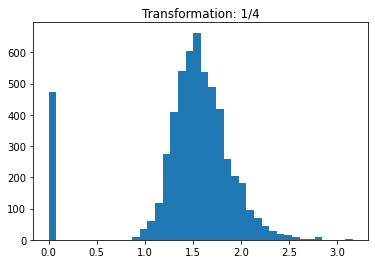

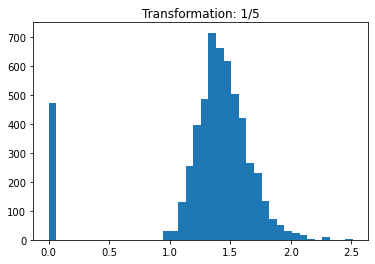

In [28]:
for i in [1,2,3,4,5]:
    plt.hist((data['punctuation'])**(1/i), bins=40)
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()

Based on these graphs, we would likely want to choose a transformation that uses a $\lambda$ equal to $4$ or $5$, as these distributions look the most like a normal distribution. 

`Note:` The stack of values that appear near zero corresponds to data with no punctuation, and any transformation on zero will keep it at zero. 

___

## Review
> 
> 
> 
> 
> 
> 